In [107]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import matplotlib.ticker as mtick
import matplotlib

In [108]:
R = 20e3
C = 10e-9
freq = np.arange(1e1, 1e5, .5)
omega = 2*mt.pi*freq
fourier_gain = (1+1j*omega*R*C)/(1-1j*omega*R*C)
Rvec = [3.2e3, 3.3e3, 5.1e3, 7.4e3, 9e3, 11.85e3, 16.19e3, 26.89e3, 34.19e3]
phase = [15.53, 23.05, 34.96, 45.16, 58.02, 72.04, 90.71, 112.07, 130.35]
R2 = 9.93e3

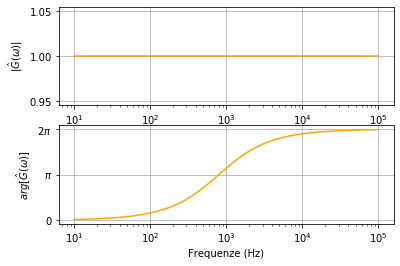

In [109]:
fig1 = plt.figure()
ax1 = plt.subplot(211)
ax1.grid()
ax1.set_ylabel('$|\hat{G}(\omega)|$')
ax2 = plt.subplot(212)
ax2.grid()
ax2.set_ylabel('$arg[\hat{G}(\omega)]$')
ax1.semilogx(freq, abs(fourier_gain), color='orange')
ax2.semilogx(freq, np.angle(fourier_gain), color='orange')
ax2.set_yticks((0, mt.pi/2, mt.pi))
ax2.set_yticklabels(('0', '$\pi$', '$2\pi$'))
ax2.set_xlabel('Frequenze (Hz)')
plt.show()

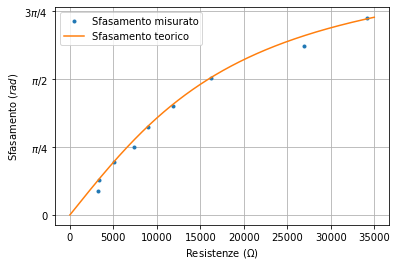

In [110]:
phth = 2*np.arctan(1e3*2*mt.pi*np.arange(0,35e3,1)*C)

fig2 = plt.figure()
plt.grid()
plt.xlabel('Resistenze ($\Omega$)')
plt.ylabel('Sfasamento ($rad$)')
plt.yticks((0, mt.pi/4, mt.pi/2, 3*mt.pi/4, mt.pi), ('0', '$\pi/4$', '$\pi/2$', '$3 \pi /4$', '$\pi$'))
plt.xlabel
plt.plot(Rvec, np.asarray(phase)*mt.pi/180, '.', label='Sfasamento misurato')
plt.plot(np.arange(0,35e3,1), phth, '-', label='Sfasamento teorico')
plt.legend(loc='best')
plt.show()

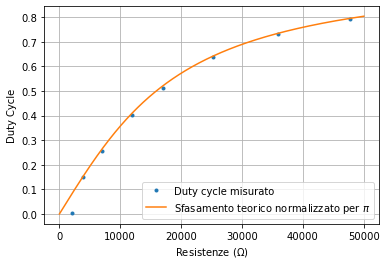

In [111]:
Rvec2 = np.asarray([2.11, 3.95, 6.93, 11.97, 16.96, 25.28, 35.86, 47.75])*1e3
dutyplus = np.asarray([0.29, 15.21, 25.72, 40.37, 51.37, 63.82, 73.01, 79.29])*1e-2

fig4 = plt.figure()
plt.grid()
plt.xlabel('Resistenze ($\Omega$)')
plt.ylabel('Duty Cycle')
#plt.xlabel()
plt.plot(Rvec2, dutyplus, '.', label='Duty cycle misurato')
plt.plot(np.arange(0,50e3,1), 2*np.arctan(1e3*2*mt.pi*np.arange(0,50e3,1)*C)/(mt.pi), '-', label='Sfasamento teorico normalizzato per $\pi$')
plt.legend(loc='best')
plt.show()

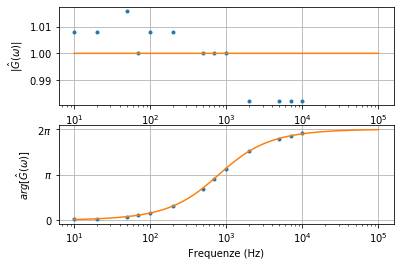

In [112]:
freq3 = [1e3, 2e3, 5e3, 7e3, 1e4, 7e2, 5e2, 2e2, 1e2, 70, 50, 20, 10]
xpphase3 = []
xpgain3 = []
for i in [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]:
    with open(f'data/7_{i}.txt') as f:
        data = f.read()
        phase = float(data.split('Phase(1-2), Cur ')[1][:4])
        pkpk1 = float(data.split('Pk-Pk(1), Cur ')[1][:4])
        pkpk2 = float(data.split('Pk-Pk(2), Cur ')[1][:4])
        xpgain3.append(pkpk2/pkpk1)
        xpphase3.append(phase)

fig3 = plt.figure()
ax1 = plt.subplot(211)
ax1.grid()
ax1.semilogx(freq3, xpgain3, '.')
ax2 = plt.subplot(212)
ax2.grid()
ax2.semilogx(freq3, np.asarray(xpphase3)*mt.pi/180, '.')
ax1.semilogx(freq, abs(fourier_gain))
ax2.semilogx(freq, np.angle(fourier_gain))
ax2.set_yticks((0, mt.pi/2, mt.pi))
ax2.set_yticklabels(('0', '$\pi$', '$2\pi$'))
ax2.set_xlabel('Frequenze (Hz)')
ax1.set_ylabel('$|\hat{G}(\omega)|$')
ax2.set_ylabel('$arg[\hat{G}(\omega)]$')
plt.show()

In [113]:
fig1.savefig('fig1.pdf', bbox_inches='tight')
fig2.savefig('fig2.pdf', bbox_inches='tight')
fig3.savefig('fig3.pdf', bbox_inches='tight')
fig4.savefig('fig4.pdf', bbox_inches='tight')